이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

In [1]:
# 코랩에서 메모리 부족을 피하기 위해 부동소수점 정밀도를 낮춥니다.
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [3]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.5972 - accuracy: 0.8198 - val_loss: 0.3325 - val_accuracy: 0.8945
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2515 - accuracy: 0.9395 - val_loss: 0.2339 - val_accuracy: 0.9307
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1688 - accuracy: 0.9673 - val_loss: 0.1870 - val_accuracy: 0.9482
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1223 - accuracy: 0.9839 - val_loss: 0.1940 - val_accuracy: 0.9429
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0887 - accuracy: 0.9907 - val_loss: 0.1495 - val_accuracy: 0.9575
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0646 - accuracy: 0.9932 - val_loss: 0.1267 - val_accuracy: 0.9653
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0483 - accuracy: 0.9966 - val_loss: 0.1335 - val_accuracy: 0.9639
Epoch 

**검증 정확도 비교 그래프 그리기**

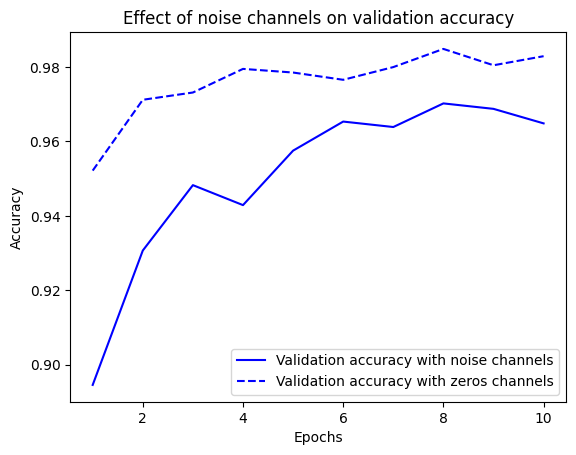

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: inf - accuracy: 0.1014 - val_loss: 2.2969 - val_accuracy: 0.1068
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: inf - accuracy: 0.1168 - val_loss: 2.3008 - val_accuracy: 0.1052
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1246 - val_loss: 2.3203 - val_accuracy: 0.0989
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1365 - val_loss: 2.3242 - val_accuracy: 0.1040
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1466 - val_loss: 2.3418 - val_accuracy: 0.1005
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1621 - val_loss: 2.3516 - val_accuracy: 0.1008
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1726 - val_loss: 2.3535 - val_accuracy: 0.1013
Epoch 8/100
375/375 

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0995
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0983 - val_loss: nan - val_accuracy: 0.0995
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0995
Epoch 8/10
375/375 [============================

**같은 모델을 적절한 학습률로 훈련하기**

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3750 - accuracy: 0.9238 - val_loss: 0.1970 - val_accuracy: 0.9404
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1256 - accuracy: 0.9854 - val_loss: 0.1469 - val_accuracy: 0.9648
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0949 - accuracy: 0.9912 - val_loss: 0.1501 - val_accuracy: 0.9678
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0817 - accuracy: 0.9941 - val_loss: 0.1388 - val_accuracy: 0.9692
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0656 - accuracy: 0.9961 - val_loss: 0.1426 - val_accuracy: 0.9746
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0600 - accuracy: 0.9976 - val_loss: 0.1639 - val_accuracy: 0.9746
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0491 - accuracy: 0.9980 - val_loss: 0.1685 - val_accuracy: 0.9707
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [9]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6670 - accuracy: 0.8389 - val_loss: 0.3584 - val_accuracy: 0.9067
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.9136 - val_loss: 0.3086 - val_accuracy: 0.9155
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.9209 - val_loss: 0.2930 - val_accuracy: 0.9180
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9292 - val_loss: 0.2844 - val_accuracy: 0.9219
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2937 - accuracy: 0.9292 - val_loss: 0.2793 - val_accuracy: 0.9219
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2866 - accuracy: 0.9321 - val_loss: 0.2749 - val_accuracy: 0.9238
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2822 - accuracy: 0.9331 - val_loss: 0.2722 - val_accuracy: 0.9268
Epoch 

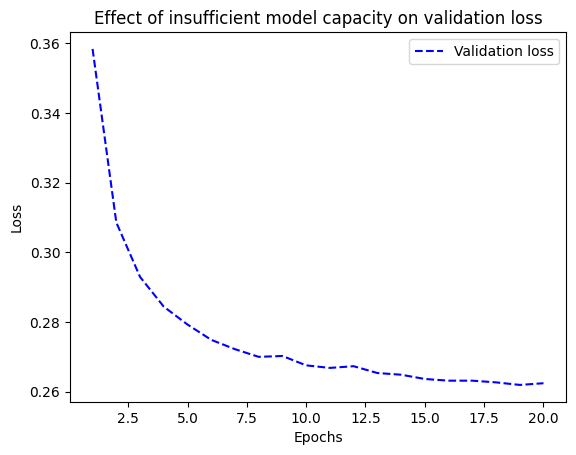

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3762 - accuracy: 0.9053 - val_loss: 0.1875 - val_accuracy: 0.9473
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1644 - accuracy: 0.9712 - val_loss: 0.1346 - val_accuracy: 0.9634
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1145 - accuracy: 0.9858 - val_loss: 0.1104 - val_accuracy: 0.9692
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9927 - val_loss: 0.0990 - val_accuracy: 0.9731
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0710 - accuracy: 0.9941 - val_loss: 0.0976 - val_accuracy: 0.9707
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0570 - accuracy: 0.9951 - val_loss: 0.1163 - val_accuracy: 0.9678
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0480 - accuracy: 0.9976 - val_loss: 0.0894 - val_accuracy: 0.9766
Epoch 

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [12]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5938 - accuracy: 0.7188 - val_loss: 0.4775 - val_accuracy: 0.8223
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3855 - accuracy: 0.8823 - val_loss: 0.3445 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2793 - accuracy: 0.9102 - val_loss: 0.2954 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2231 - accuracy: 0.9224 - val_loss: 0.3018 - val_accuracy: 0.8760
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1873 - accuracy: 0.9380 - val_loss: 0.2815 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1600 - accuracy: 0.9487 - val_loss: 0.2976 - val_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1401 - accuracy: 0.9546 - val_loss: 0.2854 - val_accuracy: 0.8882
Epoch 8/20
30

**작은 용량의 모델**

In [13]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6519 - accuracy: 0.5933 - val_loss: 0.6040 - val_accuracy: 0.7178
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5728 - accuracy: 0.7461 - val_loss: 0.5542 - val_accuracy: 0.7925
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5244 - accuracy: 0.8154 - val_loss: 0.5210 - val_accuracy: 0.7886
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4868 - accuracy: 0.8511 - val_loss: 0.4944 - val_accuracy: 0.8511
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4570 - accuracy: 0.8818 - val_loss: 0.4780 - val_accuracy: 0.8369
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4326 - accuracy: 0.9004 - val_loss: 0.4685 - val_accuracy: 0.8369
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4116 - accuracy: 0.9146 - val_loss: 0.4497 - val_accuracy: 0.8799
Epoch 8/20
30

**큰 용량의 모델**

In [14]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5781 - accuracy: 0.7070 - val_loss: 0.3630 - val_accuracy: 0.8560
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3296 - accuracy: 0.8623 - val_loss: 0.3074 - val_accuracy: 0.8687
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2310 - accuracy: 0.9097 - val_loss: 0.3416 - val_accuracy: 0.8569
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1981 - accuracy: 0.9180 - val_loss: 0.3533 - val_accuracy: 0.8462
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1459 - accuracy: 0.9448 - val_loss: 0.3137 - val_accuracy: 0.8672
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0991 - accuracy: 0.9658 - val_loss: 0.3301 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0792 - accuracy: 0.9736 - val_loss: 0.4399 - val_accuracy: 0.8687
Epoch 8/20
30

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [15]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.6064 - accuracy: 0.7861 - val_loss: 0.4951 - val_accuracy: 0.8433
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4094 - accuracy: 0.8936 - val_loss: 0.4023 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3438 - accuracy: 0.9092 - val_loss: 0.3677 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3059 - accuracy: 0.9248 - val_loss: 0.3633 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2842 - accuracy: 0.9292 - val_loss: 0.3992 - val_accuracy: 0.8672
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2688 - accuracy: 0.9375 - val_loss: 0.3679 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2593 - accuracy: 0.9404 - val_loss: 0.3628 - val_accuracy: 0.8872
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [16]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6196 - accuracy: 0.6484 - val_loss: 0.4907 - val_accuracy: 0.8433
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4905 - accuracy: 0.7754 - val_loss: 0.3745 - val_accuracy: 0.8735
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4167 - accuracy: 0.8252 - val_loss: 0.3311 - val_accuracy: 0.8848
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3608 - accuracy: 0.8628 - val_loss: 0.2959 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3181 - accuracy: 0.8843 - val_loss: 0.2827 - val_accuracy: 0.8906
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2900 - accuracy: 0.8975 - val_loss: 0.2896 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2563 - accuracy: 0.9111 - val_loss: 0.2737 - val_accuracy: 0.8926
Epoch 8/20
30

## 요약